<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/ML_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. What is Multilayer Perceptron (MLP) and Boltzmann Machine?**
*   MLP - one input, more hidden layers and one output
* Feedforward Architecture. Information flows the network in one direction
* MLPs are widely used for various tasks, including classification, regression, and pattern recognition.

---


  - Boltzman Machine is a simplified version of the MLP.
  - 2 layer model with a visible input layer and a hidden layer which makes stocastic decision
  - Boltzmann Machines and RBMs have been applied to various tasks, including dimensionality reduction, collaborative filtering, and feature learning.

In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)



prob = model.predict(X_test)

y_pred = np.argmax(prob)

# Evaluate the performance
print("Predicted Classes for New Data:", y_pred)



Epoch 1/50
3/3 - 2s - loss: 1.3126 - accuracy: 0.3333 - val_loss: 1.1770 - val_accuracy: 0.3333 - 2s/epoch - 690ms/step
Epoch 2/50
3/3 - 0s - loss: 1.2410 - accuracy: 0.3542 - val_loss: 1.1230 - val_accuracy: 0.3333 - 133ms/epoch - 44ms/step
Epoch 3/50
3/3 - 0s - loss: 1.1756 - accuracy: 0.4062 - val_loss: 1.0703 - val_accuracy: 0.4583 - 114ms/epoch - 38ms/step
Epoch 4/50
3/3 - 0s - loss: 1.1094 - accuracy: 0.4062 - val_loss: 1.0205 - val_accuracy: 0.5417 - 125ms/epoch - 42ms/step
Epoch 5/50
3/3 - 0s - loss: 1.0472 - accuracy: 0.4167 - val_loss: 0.9738 - val_accuracy: 0.5417 - 259ms/epoch - 86ms/step
Epoch 6/50
3/3 - 0s - loss: 0.9937 - accuracy: 0.4583 - val_loss: 0.9293 - val_accuracy: 0.6667 - 74ms/epoch - 25ms/step
Epoch 7/50
3/3 - 0s - loss: 0.9403 - accuracy: 0.6562 - val_loss: 0.8886 - val_accuracy: 0.8333 - 89ms/epoch - 30ms/step
Epoch 8/50
3/3 - 0s - loss: 0.8908 - accuracy: 0.7708 - val_loss: 0.8507 - val_accuracy: 0.8750 - 90ms/epoch - 30ms/step
Epoch 9/50
3/3 - 0s - loss: 0

**2. How can we relate standard deviation and variance?**
- Standard Deviation = square root of Variance
- St. deviation refers to the spread of the data from the mean.
- Variance is the average degree of all data points

In [9]:
import numpy as np

data =np.array([1,3,5,7,4,3,2])

variance= np.var(data)
std_deviation = np.sqrt(variance)

print(variance)
print(std_deviation)

3.3877551020408165
1.8405855323893037


**3. The Empiric Rule: 68- 95-99.7 or the three-sigma rule**
1. About 68% of the data falls within one standard deviation from the mean.

2. About 95% of the data falls within two standard deviations from the mean.

3. About 99.7% of the data falls within three standard deviations from the mean.

These rules are useful for understanding the distribution of data and identifying potential outliers. They are based on the assumption of a normal distribution.

**4. Is a high variance in data good or bad? And how to handle it?**
- Higher variance means the data spread is big and the features has a variety of data. It is usually bad.
- To handle high variance we can use, bagging algorithm
- Bagging algorithm splits the data intosubgroups with sampling replicated from random data
- Also, using Regularization (L1, L2), Cross-Validation, Feature Engineering, Ensemble methods can be used for handling

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples =200, n_features =1, noise =10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

alpha = 1 #Regularization strength

ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))



107.8532696410056


**5. Finding MSE using GridSearchCV (code)**

In [16]:
from sklearn.model_selection import GridSearchCV

alphas = [0.1, 0.5, 0.8, 1]

ridge_model = Ridge()
param_grid = {'alpha': alphas}

gr_search = GridSearchCV(ridge_model, param_grid, cv =5, scoring = 'neg_mean_squared_error')
gr_search.fit(X_train, y_train)

best_alpha = gr_search.best_params_['alpha']

best_ridge_model = Ridge(alpha = best_alpha).fit(X_train, y_train)

y_pred_best = best_ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_best))



108.37213936746555


**6. What is a Box-Cox transformation?**
- Box-Cox transformation is a power transform which transforms non-normal dependent variables into normal variables as normality is the most common assumption made while using many statistical techniques. It has a lambda parameter which when set to 0 implies that this transform is equivalent to log-transform. It is used for variance stabilization and also to normalize the distribution.
- It is used from scipy.stats

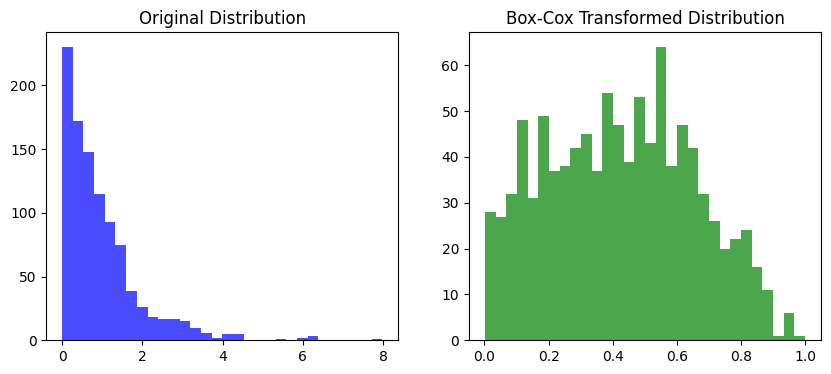

Optimal lambda value: -0.843751338053347


In [17]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

data = np.random.exponential(size=1000)

# Apply the Box-Cox transformation
transformed_data, lambda_value = boxcox(data + 1)  # Adding 1 to handle zero or negative values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Distribution')

plt.show()

# Print the estimated lambda value
print("Optimal lambda value:", lambda_value)


**7. How Will You Know Which Machine Learning Algorithm to Choose for Your Classification Problem?**

There is no strict rule, but these guidelines we can use:
- If accuracy is concern, test different algorithms and cross validation
- If training data is small, use models with low variance and high bias
- If training data is large, high variance, low bias


**8. When do you use Classification over Regression?**
- When the target is caterogical (yes/no, estimating gender, type of color)
- Both of them belong to supervised machine learning algorithms
- When the target is continous: estimating sales and prices of a product, predicting the score of a team.

- We can use sklearn datasets to check (make_classification for classification, make_regression for regression)

In [8]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

X,y = make_classification(n_samples=10)

a,b = make_regression(n_samples = 10)

print(y)
print(b)

[1 1 1 0 0 0 0 0 1 1]
[  47.03321534  220.52449793  326.83346596 -195.32292231  -39.27618741
   55.64461199 -104.14368427  -32.15874667  -25.25736559   76.96244146]


**9. Can You mention some advantages and disadvantages of Decision Trees?**
- advantages: easy to interpret, robust to outliers, few parameters to tune
- disadvantages: prone to overfitting

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

**10. Explain the differences between Random Forest and Gradient Boosting machines**

- Random Forest (RF): RF is an ensemble method based on bagging. It builds multiple decision trees independently and combines their predictions through averaging (for regression) or voting (for classification).
- Gradient Boosting Machines (GBM): GBM, on the other hand, is an ensemble method based on boosting. It builds decision trees sequentially, with each tree correcting the errors of the previous one.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Random Forest Mean Squared Error: 11222.670286372868
Gradient Boosting Mean Squared Error: 14745.410304234038


**11. What is a Fourier Transform?**
- It is mathematical technique that transforms any function of time to a function of frequency.
- It is closely related to Fourier Series. It takes any time-based pattern for input and calculates the overall cycle offset, rotation speed and strength for all possible cycles.
- It is commonly used in Engineering, signal processing, image analysis

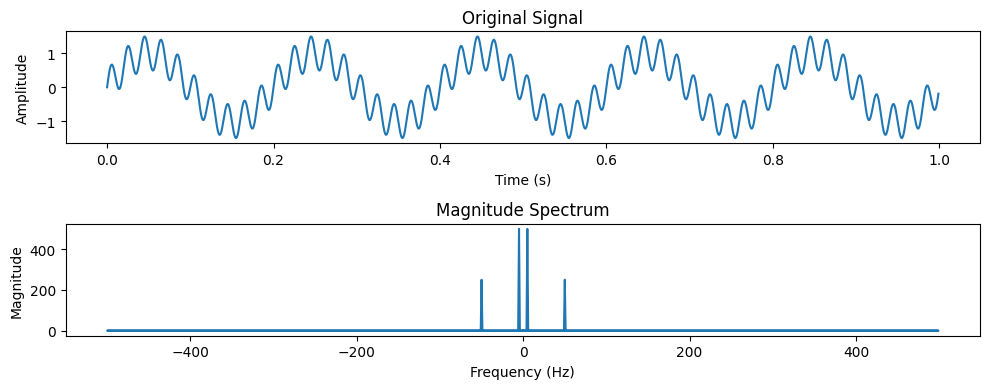

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
f1 = 5  # Frequency of the first sinusoid
f2 = 50  # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute the Fourier Transform
freq = np.fft.fftfreq(len(signal), 1/fs)
fft_result = np.fft.fft(signal)

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


**12. Explain the Curse of Dimensionality?**
- It refers when the data has too many features
- If we have more features than observations, we have a risk of overfitting the model.
- When we have too many features, observations become harder to cluster. Too many dimensions cause every observation in the dataset to appear equidistant from all others and no meaningful clusters can be formed.

**13. What is Principle Component Analysis?**
- A technique that reduces the dimensionality of the dataset by reducing the number of variables that correlated with each other.
- The variables are transformed into a new set of variables that are known as Principal Components’. These PCs are the eigenvectors of a covariance matrix and therefore are orthogonal.


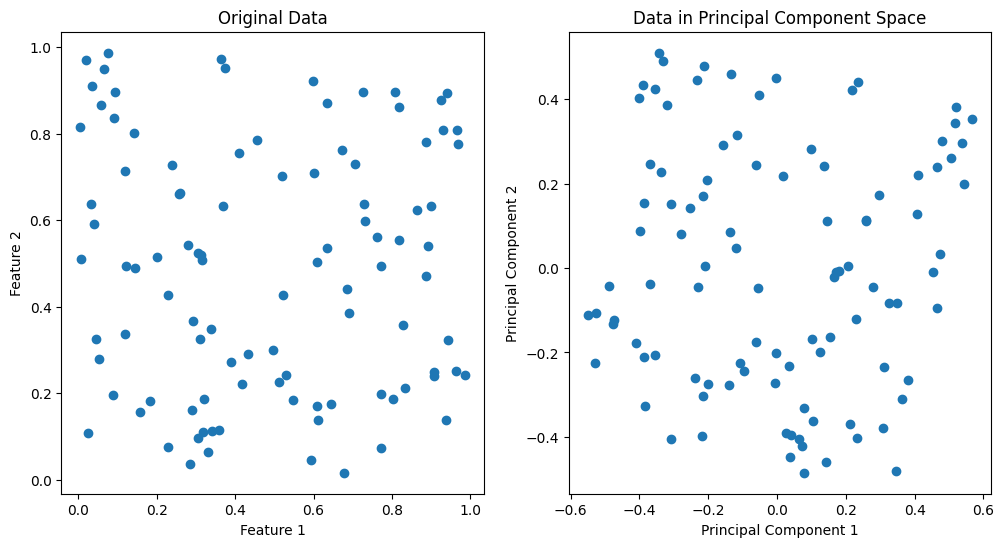

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
data = np.random.rand(100,2)

plt.figure(figsize = (12,6))
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data)

plt.subplot(1,2,1)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(data[:,0], data[:,1])


plt.subplot(1,2,2)
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title('Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

**14. What is the Normal Distribution?**
- Also known, as the Gaussian Distribution or Bell curve
- Continuous probability distribution that is symmetric around its mean, meaning that the probability of an outcome decreases as it deviates from the mean in either direction
- The shape of the normal distribution characterized by its mean and standard deviation


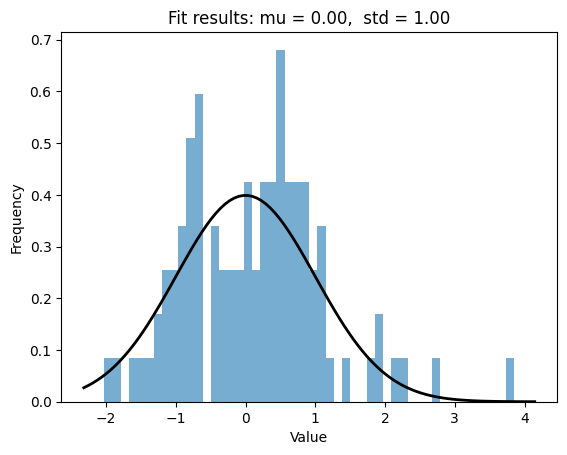

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Mean and St deviation
mu = 0
sigma = 1

data =np.random.normal(mu,sigma,100)

plt.hist(data, bins =50, density = True, alpha = 0.6)
xmin, xmax =plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, sigma))
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

**15. What is the difference between regularization and normalization?**
- Normalization adjusts the data
- Regularization adjusts the prediction function
- Regularization is concerned with controlling the complexity of a model to prevent overfitting, while normalization is focused on scaling and centering input features to ensure a stable and efficient learning process.

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X,y = data, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standartize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Regularization using Ridge
ridge_model = Ridge(alpha = 0.6).fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Regression MSE: {ridge_mse}')

# Apply Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression MSE: {lasso_mse}')


Ridge Regression MSE: 27.40379063180332
Lasso Regression MSE: 27.384800174428836


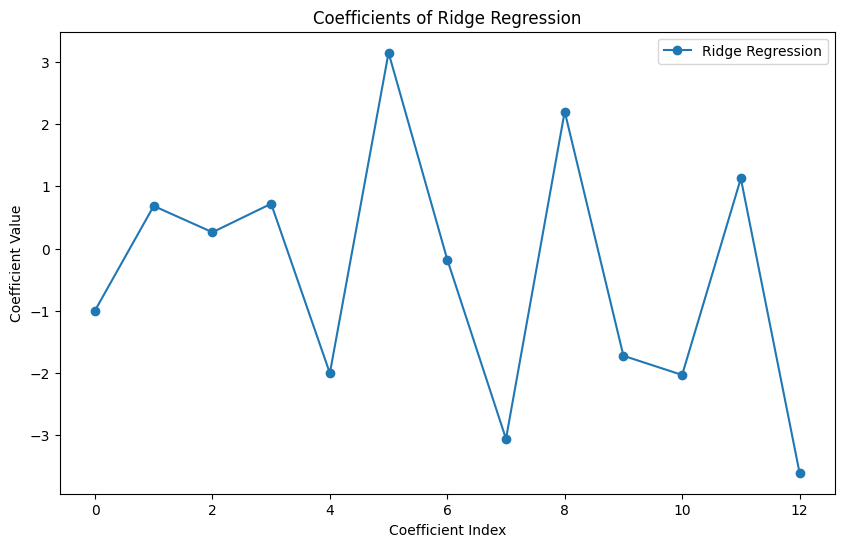

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ridge_model.coef_, marker='o', label='Ridge Regression')
plt.title('Coefficients of Ridge Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

**16. Explain the difference between Normalization and Standardization**
- The goal of normalization is to scale the values of the features to a specific range. Usually, [0,1]
- The goal of Standardization is to rescale the features so that they have a mean of 0 and a st. deviation of 1.
- Normalization is useful when all parameters need to have the identical positive scale however the outliers from the data set are lost. Hence, standardization is recommended for most applications.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Normalization using Min-Max scaling
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)

print("Normalized Data:")
print(normalized_data)
print()

# Standardization using Z-score scaling
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data)

Normalized Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


**17. List the most popular distribution curves**
1. Uniform distribution is a probability distribution that has a constant probability. Rolling a single dice is one example because it has a fixed number of outcomes.
2. Binomial distribution is a probability with only two possible outcomes, the prefix ‘bi’ means two or twice. An example of this would be a coin toss. The outcome will either be heads or tails.
3. Normal distribution describes how the values of a variable are distributed. It is typically a symmetric distribution where most of the observations cluster around the central peak. The values further away from the mean taper off equally in both directions. An example would be the height of students in a classroom.
4. Poisson distribution helps predict the probability of certain events happening when you know how often that event has occurred. It can be used by businessmen to make forecasts about the number of customers on certain days and allows them to adjust supply according to the demand.
5. Exponential distribution is concerned with the amount of time until a specific event occurs. For example, how long a car battery would last, in months.

In [20]:
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import norm

 **18. Kernel trick and popular Kernels in Support Vector Machines (SVM)**
- Kernel trick is a math function which when applied on data points, can find the region of classification between two different classes.
- Kernels: RBF, Linear, Sigmoid, Polynomial, Hyperbolic, Laplace and etc.





In [1]:
from sklearn.svm import SVC

svm_model = SVC(kernel ='rbf')

**19. How we can handle outliers?**
- We can find using box plot, scatter plot, Z-Score, IQR score
- Then by using some threshold we can remove outliers

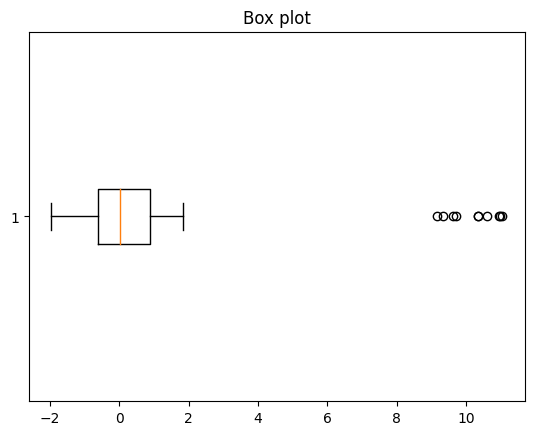

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

data = np.concatenate([np.random.normal(0, 1, 50), np.random.normal(10, 1, 10)])


plt.boxplot(data, vert = False)
plt.title('Box plot')
plt.show()


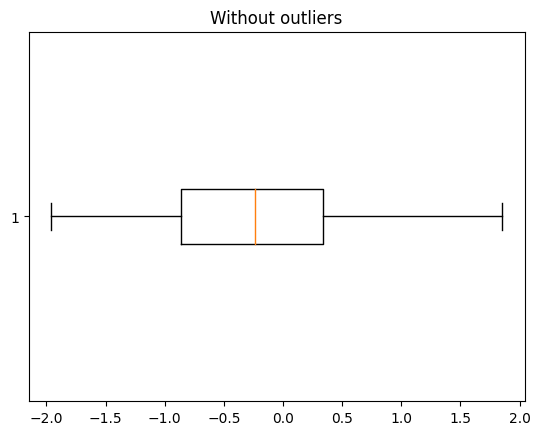

In [15]:
#Set threshold to identify outliers
threshold = 5

outliers = np.abs(data - np.median(data)>threshold)
data_without_outliers = data[~outliers]

plt.boxplot(data_without_outliers, vert = False)
plt.title('Without outliers')
plt.show()

**20. Why boosting is a more stable algorithm as compared to other ensemble algorithms?**
- Boosting focuses on errors found in previous iterations un til they become obsolete
- In other hand, bagging has no this kind of loop.

**21. List of popular cross validation techniques?**
- K Fold, Stratified K fold
- Random Search CV, Grid Search CV
- Bootstrapping, Leave one out

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


np.random.seed(42)
X = np.random.rand(50, 10)
y = np.random.choice([0, 1], size=50)

n_iterations = 100

n_folds = 5

model = RandomForestClassifier()

cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracy_scores = []

# Perform bootstrapped cross-validation
for _ in range(n_iterations):
    bootstrap_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
    X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]

    for train_index, test_index in cv.split(X_bootstrap, y_bootstrap):
        X_train, X_test = X_bootstrap[train_index], X_bootstrap[test_index]
        y_train, y_test = y_bootstrap[train_index], y_bootstrap[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')


Mean Accuracy: 0.8180
Standard Deviation of Accuracy: 0.1188


**22. What is Bayes Theorem? State at least 1 use case with respect to the machine learning context? **
- Bayes' Theorem is a fundamental concept in probability theory that describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The theorem is named after the Reverend Thomas Bayes, who introduced it in the 18th century.
- Spam email detection is using case

**23. What is Naive Bayes? Why is it Naive?**
- Naive Bayes classifiers are a series of classification algorithms that are based on the Bayes theorem. This family of algorithm shares a common principle which treats every pair of features independently while being classified.
- Naive Bayes is considered Naive because the attributes in it (for the class) is independent of others in the same class.  This lack of dependence between two attributes of the same class creates the quality of naiveness.
- Its simplicity and efficiency make it a popular choice for text classification and other tasks, especially when the independence assumption doesn't significantly impact the model's accuracy.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**24. Some Exploratory Data Analysis (EDA) techniques**
- Visualization (Univariate, Bivariate, Multivariate Visualization)
- Missing Value Treatment with mean/median
- Outlier detections - boxplot
- Transformation on the features
- Scaling the Dataset - Apply MinMax, Standard Scaler or Z Score Scaler
- Feature Engineering
- Dimensionality reduction - reduce the volume of data without losing much information

**25. Define Receiver Operating Characteristic (ROC) curve work**
- The graphical representation of the contrast between true positive rates and the false positive rate at various threshold is known as the ROC curve.
- TPR - True Positive Rate
- FPR - False Positive Rate

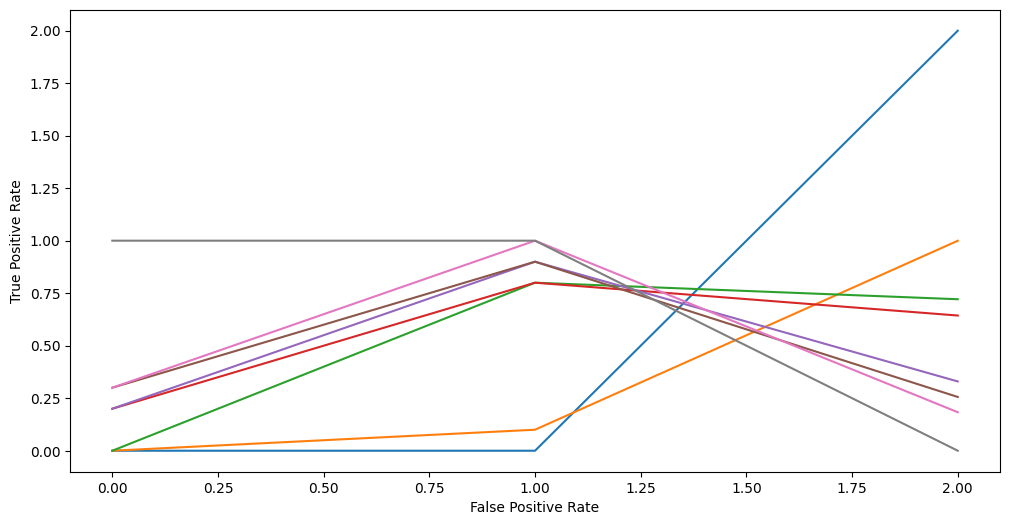

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples =100, n_features = 20)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred[:,1])

plt.figure(figsize =(12,6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(roc_curve(y_test, y_pred[:,1]))
plt.show()

**26. Main Hyperparameters of Catboost?**
- Learning rate
- Depth
- L2 Regularization
- min_data_in_leaf - from 2 to 6
- subsample

In [7]:
import catboost as cb
import sklearn.metrics
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'catboost'